In [342]:
import cv2

In [343]:
img = cv2.imread('dog.jpg')

In [360]:
img.shape

(375, 499, 3)

In [344]:
img_list = [img[:,:,i].tolist() for i in range(3)]

In [345]:
r = np.array(img_list[0])
g = np.array(img_list[1])
b = np.array(img_list[2])

In [194]:
# new = np.stack(img_list,axis = 2)

In [195]:
# new.shape

(375, 499, 3)

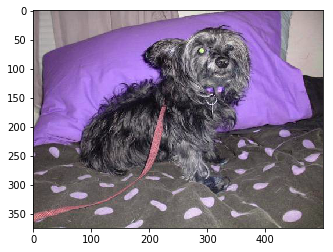

In [346]:
%matplotlib inline
plt.imshow(img)

In [7]:
def my_linspace(start,stop,num):
    step = (stop-start)/(num-1)
    i = 0
    while(i != num):
        yield start + step*i
        i = i+1

In [9]:
list(my_linspace(2,5,6))

[2.0, 2.6, 3.2, 3.8, 4.4, 5.0]

In [2]:
# import collections
# import numbers
# class my_linspace(collections.abc.Sequence): #subclass from abc.seq to get all the goodness of python bulit in 
#     #sequences.......

    
#     def __init__(self, start, stop, num):
#         if not isinstance(num, numbers.Integral) or num <= 1:
#             raise ValueError('num must be an integer > 1')
#         self.start, self.stop, self.num = start, stop, num
#         self.step = (stop-start)/(num-1)
#     def __len__(self):
#         return self.num
#     #Let's make it slicable..........
#     def __getitem__(self, i):
#         if isinstance(i, slice):
#             return [self[x] for x in range(*i.indices(len(self)))]
#         if i < 0:
#             i = self.num + i
#         if i >= self.num:
#             raise IndexError('linspace object index out of range')
#         if i == self.num-1:
#             return self.stop
#         return self.start + i*self.step
#     #let's get a good representaion...
#     def __repr__(self):
#         return '{}({}, {}, {})'.format(type(self).__name__,
#                                        self.start, self.stop, self.num)
#     def __eq__(self, other):
#         if not isinstance(other, linspace):
#             return False
#         return ((self.start, self.stop, self.num) ==
#                 (other.start, other.stop, other.num))
#     def __ne__(self, other):
#         return not self==other
#     #let's make it hashable : now we can even use it as a dictionary key.....
#     def __hash__(self):
#         return hash((type(self), self.start, self.stop, self.num))
#     #ok ...that's enough fun ...let's get down to business now.......
    
 

In [2]:
import cv2

In [3]:
def from_iterable(iterables):
    
    for it in iterables:
        for element in it:
            yield element

In [4]:
list(from_iterable([[1,2,3,4],[2],[5]])) # used to flatten the elements..

[1, 2, 3, 4, 2, 5]

In [16]:
import itertools as it 

it.chain.from_iterable([[1,2,3],5,6])

In [5]:
def simple_interpolate(row,count,k_times= False):
            
    len_row = len(row)
    new_row = []
    
    if k_times:
        for i in range(len_row-1):
            new_row.append(list(my_linspace(row[i],row[i+1],count+1)))
        
    else:
        for i in range(len_row-1):
            new_row.append([row[i]] + [(row[i]+row[i+1])/2]*count)
    new_row.append([row[-1]])   
    #return list(it.chain.from_iterable(new_row))
    return list(from_iterable(new_row))

In [8]:
simple_interpolate([1,2,4],3,k_times = True)

[1.0,
 1.3333333333333333,
 1.6666666666666665,
 2.0,
 2.0,
 2.6666666666666665,
 3.333333333333333,
 4.0,
 4]

In [348]:
def invert(mat):
    return [list(ele) for ele in zip(*mat)]

#expands a channel row-wise
def row_expand(channel,scale,k_times):
    row_expd_chnl = []
    
    for row in channel:
        row_expd_chnl.append(simple_interpolate(row,scale,k_times = k_times))
    #we have row expanded the channel now let's column expand the channel
    
    
    return row_expd_chnl


def channel_expand(chnl,scale,k_times = False):
    row_wise = row_expand(chnl,scale,k_times)
    return invert(row_expand(invert(row_wise),scale,k_times)) 
#THE ONLY METHOD WE WROTE WAS simple interpolate REST ALL ARE 
#REUSING THE SAME...HERE TO COLUMN EXPAND THE MAT ... WE INVERT THE ROW EXPANDED MAT AND PERFORM THE OPERATION...    

### I am sorry for this ugliness .... all this can be refactored into a class and making our channel numpy indexable..by making it instance of islice object...just like i have done before...but this does the job..

In [361]:
# max_row_id = 2
# max_col_id = 2
# row_ind = 1
# col_ind = 1

# def get_range(ele,row = None,border = None):
    
#     if ele == 0 and row:
#         return ele,ele+max_row_id 
    
#     if ele != 0 and row:
#         return (ele-max_row_id,ele) if border == True else ele-(max_row_id/2),ele+(max_row_id/2)
    
#     if row != True and ele == 0:
#         return ele,ele+max_col_id
    
#     else:
#         return (ele-max_col_id,ele) if border == True else ele-(max_col_id/2),ele+(max_col_id/2)
def get_range(id,new_total,old_total):
    check = old_total//2
    
    if id-check>=0 and id + check <= new_total:
        return id-check,id+check
    if id-check < 0:
        return 0,old_total
    else:
        return new_total-old_total,new_total
        
         
    
    


def get_sample(chnl,row_ind,col_ind,scale,k_times = False):
    new_chnl = channel_expand(chnl,scale,k_times)
    #return new_chnl
    max_old_row_id = len(chnl) - 1
    max_old_col_id = len(chnl[0]) - 1
    max_new_row_id = len(new_chnl) - 1
    max_new_col_id = len(new_chnl[0]) - 1
    if k_times:
        scale = scale - 1
    assert row_ind <= max_old_row_id,'row index out of bound'
    row_rg = get_range((row_ind*scale )+ row_ind,max_new_row_id,max_old_row_id)

    assert col_ind <= max_old_col_id,'column index out of bound'
    col_rg = get_range((col_ind*scale )+ col_ind,max_new_col_id,max_old_col_id)
    
    sample = [new_chnl[i][col_rg[0]:col_rg[1]+1] for i in range(row_rg[0],row_rg[1]+1)]
    
    return sample
    #return row_rg,col_rg,new_chnl

    

In [364]:
def zoomed(img,row_ind,col_ind,scale,k_times = False):
    channels = [img[:,:,i].tolist() for i in range(3)]
    new_channels = [get_sample(channel,row_ind,col_ind,scale,k_times = k_times) for channel in channels ]
    return np.uint(np.stack(new_channels,axis = 2))
    

# <span class="girk">TESTING:</span>

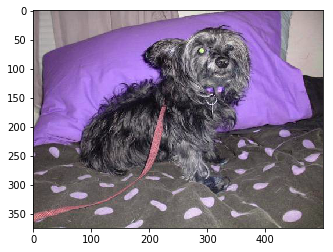

In [365]:
plt.imshow(img)

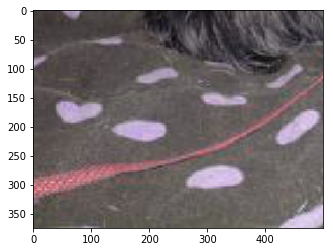

In [366]:
plt.imshow(zoomed(img,374,100,2))

In [ ]:
# plotting only single channel here

In [350]:
row,col,new_chnl = get_sample(r.tolist(),374,100,2)

In [351]:
sample = [new_chnl[i][col[0]:col[1]+1] for i in range(row[0],row[1]+1)]

In [352]:
np.array(sample).shape

(375, 499)

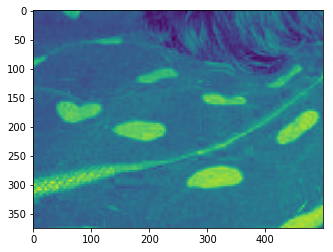

In [353]:
plt.imshow(np.uint(np.array(sample)))

In [355]:
row,col,new_chnl = get_sample(r.tolist(),374,100,2,k_times = True)

In [356]:
sample = [new_chnl[i][col[0]:col[1]+1] for i in range(row[0],row[1]+1)]

In [357]:
np.array(sample).shape

(375, 499)

# Note: with same k.. in case of k-times sampler we are only inserting <span class="girk">k-1</span> values between any two orginal values..we can clerly see the effect of it..

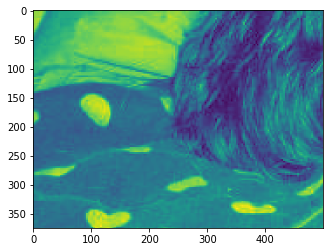

In [358]:
plt.imshow(np.uint(np.array(sample)))  